#                                     Credit card Fraud Detection

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
import pickle
import joblib

## Importing Dataset

In [2]:
credit_card_data = pd.read_csv("D:./4th/creditcard.csv")

# Data Understanding & Preprocessing

## first 5 rows of the dataset

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## last 5 rows of the dataset

In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## dataset informations

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## checking the number of missing values in each column

In [6]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###### there is no null values

## Checking Distribution of legit transactions & fraudulent transactions

In [7]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 Means --> Normal Transaction

1 Means --> fraudulent transaction
###### That's  mean that This Dataset is highly unblanced

## separating the data for analysis

In [8]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


## statistical measures of the data

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## compare the values for both transactions

In [12]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:xlabel='Class', ylabel='count'>

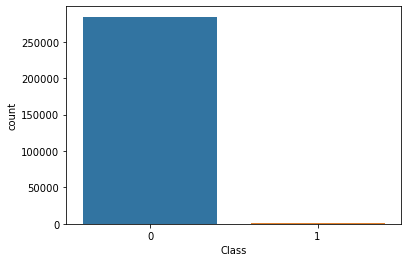

In [13]:
sns.countplot(x='Class', data=credit_card_data)

### Under-Sampling
Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492



In [14]:
legit_sample = legit.sample(n=492)

## Concatenating two DataFrames

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)


In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134157,80674.0,0.525255,-2.114507,0.583554,-0.494576,-0.930707,2.321604,-1.175637,0.763659,-0.088073,...,0.337440,0.526202,-0.191738,-1.304353,-0.048130,-0.144923,0.058549,0.050983,325.36,0
243917,152127.0,-0.992627,1.070510,1.768681,-0.349038,-0.396973,-0.400382,0.244198,0.416698,-0.207116,...,-0.116092,-0.411336,-0.183228,0.030222,0.355843,-0.419781,-0.048172,0.011345,20.00,0
66510,52086.0,1.092119,-0.615423,1.055025,0.309710,-1.341752,-0.390694,-0.630484,0.087632,1.334334,...,-0.207102,-0.518125,0.035903,0.432742,0.083705,0.939478,-0.051109,0.023030,70.00,0
160027,113087.0,-1.666647,2.370302,-1.337844,-0.592824,-0.279106,-1.355767,0.303387,0.620278,0.564578,...,0.317397,1.250813,0.040449,0.009295,-0.493863,-0.190401,0.786689,0.499061,0.89,0
275963,166816.0,-1.070922,1.588169,-0.651751,-0.808078,0.231805,-0.501000,0.295713,0.833820,-0.600594,...,-0.049331,-0.145815,0.174245,0.790853,-0.723718,0.104490,0.247502,0.201449,3.47,0


In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94962.012195,-0.139346,0.055962,0.051260,-0.071748,-0.030105,-0.022812,-0.006806,0.109798,-0.018403,...,-0.006101,0.011500,0.018870,0.007464,-0.011071,0.040348,-0.004549,0.010228,0.015387,80.397398
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Splitting the data into Features & Targets

In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
134157   80674.0  0.525255 -2.114507  0.583554 -0.494576 -0.930707  2.321604   
243917  152127.0 -0.992627  1.070510  1.768681 -0.349038 -0.396973 -0.400382   
66510    52086.0  1.092119 -0.615423  1.055025  0.309710 -1.341752 -0.390694   
160027  113087.0 -1.666647  2.370302 -1.337844 -0.592824 -0.279106 -1.355767   
275963  166816.0 -1.070922  1.588169 -0.651751 -0.808078  0.231805 -0.501000   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(Y)

134157    0
243917    0
66510     0
160027    0
275963    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Split the data into Training data & Testing Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (688, 30) (296, 30)


# Model Training

## 1-Logistic Regression

In [23]:
logistic_model = LogisticRegression()

### training the Logistic Regression Model with Training Data

In [24]:
logistic_model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation


#### Accuracy Score

##### accuracy on training data

In [25]:
Xl_train_prediction = logistic_model.predict(X_train)
training_data_accuracy = accuracy_score(Xl_train_prediction, Y_train)

In [26]:
print('Accuracy on Training data  of logistic  model : ', training_data_accuracy)

Accuracy on Training data  of logistic  model :  0.9447674418604651


##### accuracy on test data

In [27]:
Xl_test_prediction = logistic_model.predict(X_test)
lac = accuracy_score(Xl_test_prediction, Y_test)

In [28]:
print('Accuracy score on Test Data of logistic model: ', lac)

Accuracy score on Test Data of logistic model:  0.9290540540540541


## 2-Decision Tree Classifier

In [29]:
DT = DecisionTreeClassifier( max_depth=5)

### training the Decision Tree Classifier  Model with Training Data

In [30]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

### Model Evaluation

#### Accuracy Score

##### accuracy on training data¶

In [31]:
Xd_train_prediction = DT.predict(X_train)
trainingd_data_accuracy = accuracy_score(Xd_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data  of Decision Tree  model : ', trainingd_data_accuracy)

Accuracy on Training data  of Decision Tree  model :  0.9738372093023255


#### accuracy on test data

In [33]:
Xd_test_prediction = DT.predict(X_test)
dtac= accuracy_score(Xd_test_prediction, Y_test)

In [34]:
print('Accuracy score on Test Data of Decision Tree model: ', dtac)

Accuracy score on Test Data of Decision Tree model:  0.9155405405405406


# 3-K-Nearest Neighbors

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

### training the K-Nearest Neighbors Model with Training Data

In [36]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Model Evaluation

#### Accuracy Score

#### accuracy on training data

In [37]:
Xk_train_prediction = knn.predict(X_train)
trainingk_data_accuracy = accuracy_score(Xk_train_prediction, Y_train)

In [38]:
print('Accuracy on Training data  of K-Nearest Neighbors model : ', trainingk_data_accuracy)

Accuracy on Training data  of K-Nearest Neighbors model :  0.747093023255814


#### accuracy on test data

In [39]:
Xk_test_prediction = knn.predict(X_test)
kac = accuracy_score(Xk_test_prediction, Y_test)

In [40]:
print('Accuracy score on Test Data of K-Nearest Neighbors model: ', kac)

Accuracy score on Test Data of K-Nearest Neighbors model:  0.6081081081081081


# 4-Random Forest Classifier  model

In [41]:
Rclf = RandomForestClassifier(max_depth=7)

### training the Random Forest Classifier Model with Training Data

In [42]:
Rclf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

### Model Evaluation¶

### Accuracy Score

#### accuracy on training data

In [43]:
Xr_train_prediction = Rclf.predict(X_train)
trainingr_data_accuracy = accuracy_score(Xr_train_prediction, Y_train)

In [44]:
print('Accuracy on Training data  of Random Forest Classifier  model : ', trainingr_data_accuracy)

Accuracy on Training data  of Random Forest Classifier  model :  0.9767441860465116


#### accuracy on test data


In [45]:
Xr_test_prediction = Rclf.predict(X_test)
rac = accuracy_score(Xr_test_prediction, Y_test)

In [46]:
print('Accuracy score on Test Data of Random Forest Classifier model: ', rac)

Accuracy score on Test Data of Random Forest Classifier model:  0.9324324324324325


# 5-Gaussian Naive Bayes

In [47]:
gs=GaussianNB()


In [48]:
gs.fit(X_train, Y_train)

GaussianNB()

### training the Gaussian Naive Bayes  Model with Training Data

In [49]:
Xg_train_prediction = gs.predict(X_train)
trainingg_data_accuracy = accuracy_score(Xg_train_prediction, Y_train)

### Model Evaluation¶

### Accuracy Score

#### accuracy on training data

In [50]:
print('Accuracy on Training data  of Gaussian Naive Bayes  model : ', trainingg_data_accuracy)

Accuracy on Training data  of Gaussian Naive Bayes  model :  0.8575581395348837


#### accuracy on test data

In [51]:
Xg_test_prediction = gs.predict(X_test)
gac = accuracy_score(Xg_test_prediction, Y_test)

In [52]:
print('Accuracy score on Test Data of Gaussian Naive Bayes model: ', gac)

Accuracy score on Test Data of Gaussian Naive Bayes model:  0.8547297297297297


## 6- support vector machines

In [53]:
Svm = svm.SVC()


### training the support vector machines Model with Training Data

In [54]:
Svm.fit(X_train, Y_train)

SVC()

### Model Evaluation

### Accuracy Score

### accuracy on training data

In [55]:
Xs_train_prediction = Svm.predict(X_train)
trainings_data_accuracy = accuracy_score(Xs_train_prediction, Y_train)

In [56]:
print('Accuracy on Training data  of support vector machines  model : ', trainings_data_accuracy)

Accuracy on Training data  of support vector machines  model :  0.5988372093023255


### accuracy on test data

In [57]:
Xs_test_prediction = Svm.predict(X_test)
sac = accuracy_score(Xs_test_prediction, Y_test)

In [58]:
print('Accuracy score on Test Data of support vector machines model: ', sac)

Accuracy score on Test Data of support vector machines model:  0.543918918918919


## Comparison visualization of the 6 models


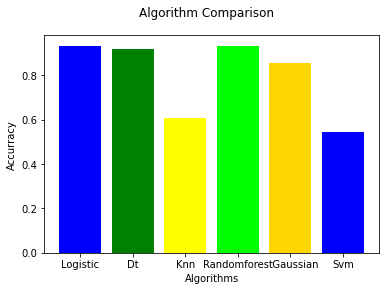

In [59]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
x=["Logistic","Dt","Knn","Randomforest","   Gaussian","Svm"]
y=[lac,dtac,kac,rac,gac,sac]
z=["blue","green","yellow","lime","gold"]
plt.bar(x,y,width=.8,color=z)
plt.xlabel("Algorithms")
plt.ylabel("Accurracy")
plt.show()

In [60]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [61]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
filename = "Completed_model.joblib"
joblib.dump(model, filename)

['Completed_model.joblib']

In [62]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

1.0
